In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys

%matplotlib inline

In [2]:


# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [3]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.7+ KB


In [4]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [8]:
df.to_csv('Lesson3.csv', index=False)
print('done')

done


In [9]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [10]:
# Clean State Column, convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())

In [11]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [12]:
# Only grab where Status == 1
mask = df['Status'] == 1
df = df[mask]

In [13]:
# Convert NJ to NY
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

/home/nickedes/nickedesEnv/local/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nickedes/nickedesEnv/local/lib/python3.4/site-packages/pandas/core/generic.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/nickedes/nickedesEnv/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(co

In [15]:
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

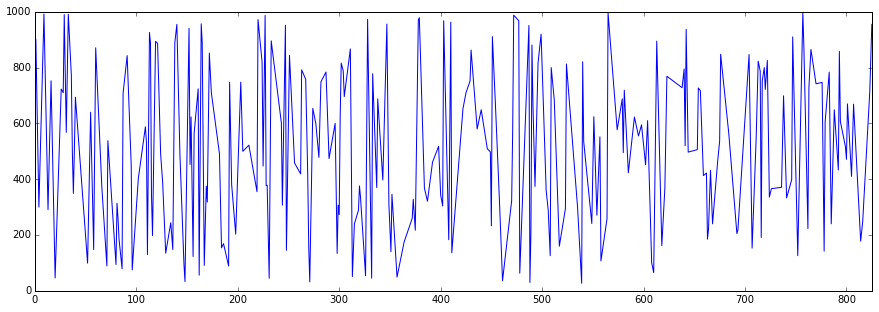

In [16]:
df['CustomerCount'].plot(figsize=(15,5));

In [17]:
sortdf = df[df['State']=='NY'].sort(axis=0)
sortdf.head(10)

,State,Status,CustomerCount,StatusDate
9,NY,1,992,2009-03-09
16,NY,1,753,2009-04-27
29,NY,1,990,2009-07-27
36,NY,1,772,2009-09-14
38,NY,1,349,2009-09-28
40,NY,1,694,2009-10-12
55,NY,1,640,2010-01-25
66,NY,1,375,2010-04-12
72,NY,1,538,2010-05-24
81,NY,1,314,2010-07-26


In [18]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

index  Status  CustomerCount
State StatusDate                              
FL    2009-01-12      1       1            901
      2009-02-02    422       1            653
      2009-03-23    429       1            752
      2009-04-06    653       2           1086
      2009-06-08    440       1            649

In [19]:
del Daily['Status']
Daily.head()

index  CustomerCount
State StatusDate                      
FL    2009-01-12      1            901
      2009-02-02    422            653
      2009-03-23    429            752
      2009-04-06    653           1086
      2009-06-08    440            649

In [20]:
# Select the State index
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [21]:
# Select the StatusDate index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06', 
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name='StatusDate', length=161, freq=None, tz=None)

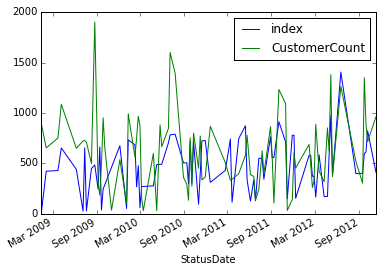

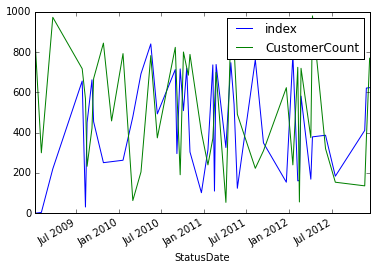

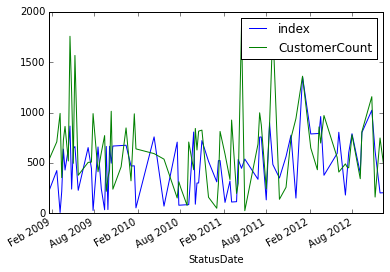

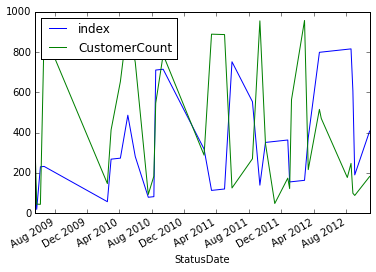

In [22]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

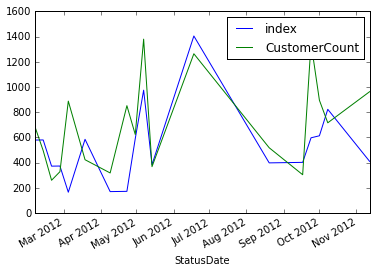

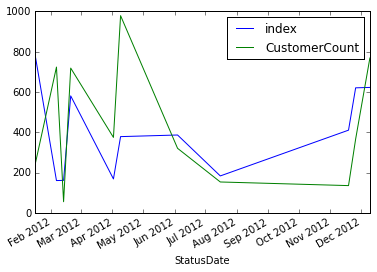

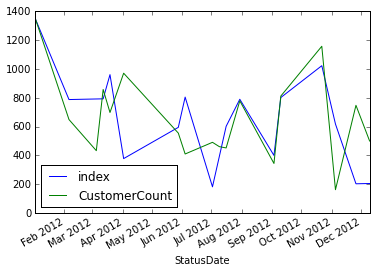

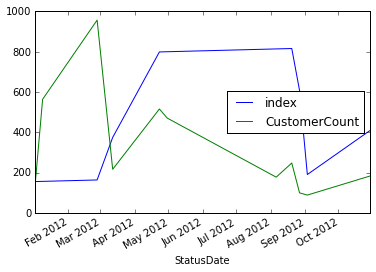

In [23]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

In [24]:
# Calculate Outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

In [25]:
Daily.head()

index  CustomerCount  Lower   Upper Outlier
State StatusDate                                             
FL    2009-01-12      1            901  450.5  1351.5   False
      2009-02-02    422            653  326.5   979.5   False
      2009-03-23    429            752  376.0  1128.0   False
      2009-04-06    653           1086  543.0  1629.0   False
      2009-06-08    440            649  324.5   973.5   False

In [26]:
# Combine all markets

# Get the max customer count by Date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-01-19,522,901
2009-02-02,953,953
2009-02-23,710,953


In [27]:
# Create the BHAG dataframe
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [28]:
# Combine the BHAG and the ALL data set 
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort(axis=0)
combined.tail()

,BHAG,CustomerCount,Max
2012-11-19,NaN,136,1115
2012-11-26,NaN,1115,1115
2012-12-10,NaN,1269,1269
2012-12-31,2000,NaN,NaN
2013-12-31,3000,NaN,NaN


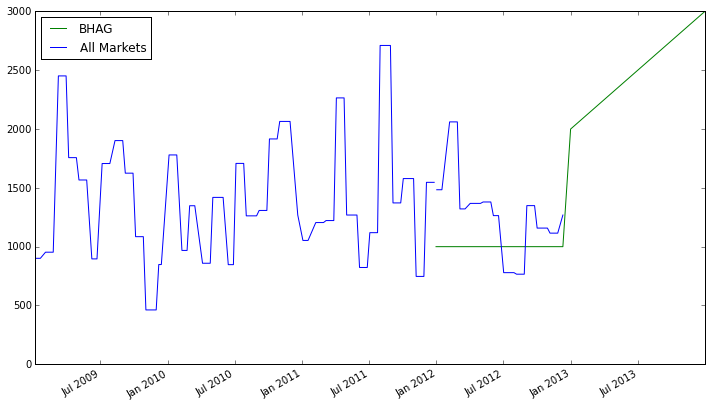

In [29]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best');

In [30]:
# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,CustomerCount,Max
2009,NaN,2452,2452
2010,NaN,2065,2065
2011,1000,2711,2711
2012,2000,2061,2061
2013,3000,NaN,NaN


In [31]:
# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,BHAG,CustomerCount,Max,YR_PCT_Change
2009,NaN,2452,2452,NaN
2010,NaN,2065,2065,-0.157830
2011,1000,2711,2711,0.312833
2012,2000,2061,2061,-0.239764
2013,3000,NaN,NaN,NaN


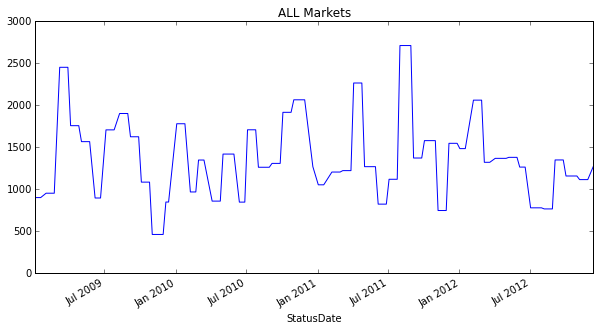

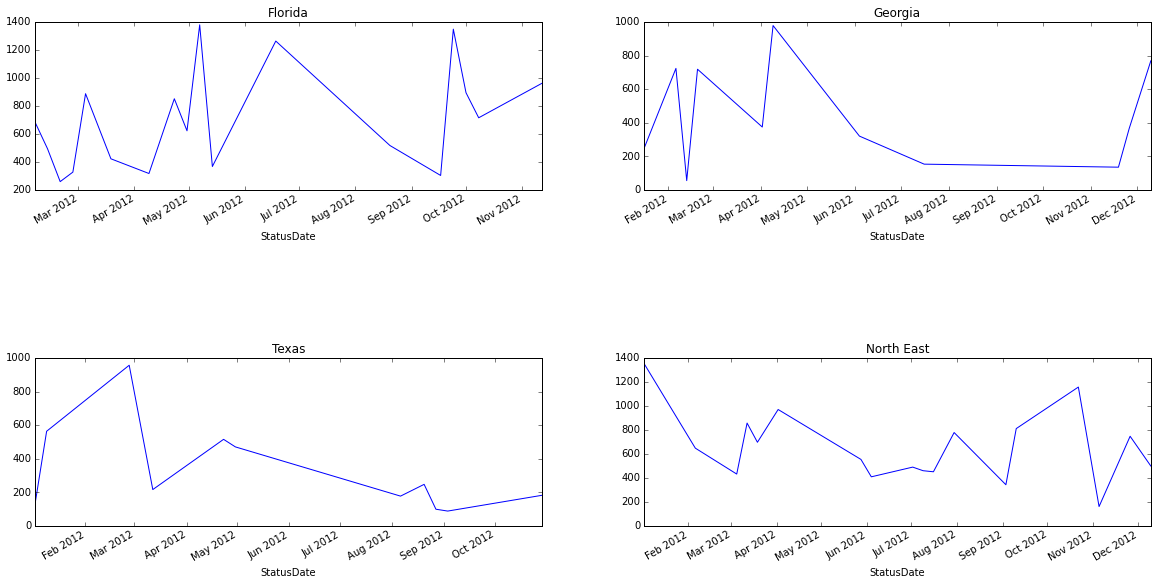

In [32]:
# Present data
# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East');